In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [3]:
import yfinance as yf 


In [4]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="D",periods=len(usd)))
usd=usd.dropna()
usd

,USD/TL
2006-01-02,1.3483
2006-01-03,1.3506
2006-01-04,1.3484
2006-01-05,1.3381
2006-01-06,1.3362
...,...
2024-07-08,32.6889
2024-07-09,32.6989
2024-07-10,32.7952
2024-07-11,32.9441


In [5]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-02-29,2073.88
2024-03-31,2139.47
2024-04-30,2207.50
2024-05-31,2281.85


In [6]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2024-03-31,2.396667
2024-04-30,1.982216
2024-05-31,1.859475
2024-06-30,3.106854


In [7]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-03-31,2.687835
2024-04-30,2.405048
2024-05-31,3.570039


In [8]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2024-01-31,9.0
2024-02-29,8.7
2024-03-31,8.6
2024-04-30,8.5


In [9]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-03-31,84.665499
2024-04-30,88.999999
2024-05-31,82.991819


In [10]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-03-31,4.108658
2024-04-30,1.832087
2024-05-31,2.996833


In [11]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-03-31,47.287619
2024-04-30,51.357222
2024-05-31,50.544545
2024-06-30,50.106471


In [12]:
motorin=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar.xls")
motorin=motorin.iloc[-1,:]
motorin=pd.DataFrame(motorin[3:])
motorin=motorin.set_index(pd.date_range(start="2005-01-31",periods=len(motorin),freq="M"))
motorin.columns=["Motorin"]
motorin

,Motorin
2005-01-31,1.75
2005-02-28,1.78
2005-03-31,1.87
2005-04-30,1.94
2005-05-31,1.88
...,...
2024-02-29,43.0968
2024-03-31,42.0568
2024-04-30,42.6763
2024-05-31,41.2854


In [13]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-03-31,57.272000
2024-04-30,67.567500
2024-05-31,64.538000
2024-06-30,59.695000


In [14]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-02-29,0.94
2024-03-31,0.64
2024-04-30,0.55
2024-05-31,0.47


In [15]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2024-02-29,4.070637
2024-03-31,3.926249
2024-04-30,4.894259
2024-05-31,3.589407


In [16]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2024-02-29,7.576163
2024-03-31,3.571725
2024-04-30,3.524351
2024-05-31,3.562117


In [17]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2024-02-29,3.737000
2024-03-31,3.294983
2024-04-30,3.602753
2024-05-31,1.957875


In [18]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2024-01-31,-0.013509
2024-02-29,-12.996120
2024-03-31,5.560892
2024-04-30,7.087821


In [19]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2024-01-31,0.410951
2024-02-29,-9.739818
2024-03-31,6.280869
2024-04-30,7.387077


In [20]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2024-02-29,3.80
2024-03-31,3.43
2024-04-30,3.25
2024-05-31,3.04


In [21]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"].resample('M').mean().rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["ÜFEt1"]=üfe["ÜFE"].shift(1)
data["ÜFEt2"]=üfe["ÜFE"].shift(2)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,Motorin,TÜFE,TÜFEt-1,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.000000,0.218500,NaN,NaN,NaN,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,0.975610,0.274548,0.218500,2.204708,0.256616,NaN,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,2.898551,1.336769,0.274548,2.711175,0.247960,0.256616,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,4.694836,1.875397,1.336769,1.323922,1.938881,0.247960,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,3.239458,-2.413172,3.162671,4.529188,2.359600,3.737000,4.136164,3.571725,7.576163,3.926249,5.560892,6.280869,3.43
2024-04-30,2.452282,1.473008,3.179759,3.162671,2.687835,3.294983,3.737000,3.524351,3.571725,4.894259,7.087821,7.387077,3.25
2024-05-31,1.565526,-3.259186,3.368063,3.179759,2.405048,3.602753,3.294983,3.562117,3.524351,3.589407,-14.766322,-2.558099,3.04
2024-06-30,0.553511,0.290660,1.640774,3.368063,3.570039,1.957875,3.602753,3.760332,3.562117,3.420697,NaN,NaN,2.52


In [22]:

data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam','TÜFEt-1','ParaArzi','Kredi','İhracat','İthalat','Mevduat Faizi','Anket','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)

data["İşsizlik"].iloc[-2:]=8.4


data=data.loc["2014-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["ÜFEt1"].iloc[-1]=1.38
data["ÜFEt2"].iloc[-2:]=[1.96,1.38]
data["TÜFECt1"].iloc[-1]=1.73
data["Motorin"].iloc[-1]=9.40
data["TÜFECt2"].iloc[-1]=3.76
data=data.dropna()
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,İhracat,İthalat,Mevduat Faizi,Anket,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2014-01-31,3.732429,2.881984,3.413428,0.37,5.265777,0.460607,3.375162,2.886648,-7.844611,7.652883,9.0220,1.06,9.2,7.503636,0.618013,0.625859,1.106494,-0.111246,0.333618,1.978080
2014-02-28,3.033477,1.685899,1.958423,0.31,0.000000,1.978080,1.804994,2.214819,-6.175956,-14.641565,10.6275,0.69,9.5,10.070500,1.106494,-0.111246,3.319203,0.308798,1.009554,0.428192
2014-03-31,2.465778,-2.278097,0.229599,0.16,0.000000,0.428192,0.451349,1.160171,4.991889,-6.505852,11.3125,0.65,9.5,10.200952,3.319203,0.308798,1.383675,0.701489,0.989257,1.125608
2014-04-30,-1.344724,-6.214384,0.730196,0.23,0.000000,1.125608,0.796760,0.126575,12.575902,13.043316,11.0200,0.76,9.7,10.046190,1.383675,0.701489,0.736212,1.197755,2.649799,1.344970
2014-05-31,-1.859714,-0.561578,-0.093468,0.26,0.000000,1.344970,-0.362357,0.464970,-7.919312,0.662228,10.4940,0.63,9.7,9.891000,0.736212,1.197755,0.085477,2.119546,0.211698,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,3.239458,-2.413172,2.359600,0.64,0.000000,4.529188,1.467195,3.009414,5.560892,6.280869,57.2720,3.43,8.6,47.287619,4.136164,7.576163,3.737000,3.571725,3.926249,3.162671
2024-04-30,2.452282,1.473008,2.687835,0.55,0.000000,3.162671,2.396667,3.023668,7.087821,7.387077,67.5675,3.25,8.5,51.357222,3.737000,3.571725,3.294983,3.524351,4.894259,3.179759
2024-05-31,1.565526,-3.259186,2.405048,0.47,0.000000,3.179759,1.982216,2.979193,-14.766322,-2.558099,64.5380,3.04,8.4,50.544545,3.294983,3.524351,3.602753,3.562117,3.589407,3.368063
2024-06-30,0.553511,0.290660,3.570039,0.48,0.000000,3.368063,1.859475,2.317994,0.000000,0.000000,59.6950,2.52,8.4,50.106471,1.960000,3.562117,1.957875,3.760332,3.420697,1.640774


## Cari Ay Enflasyon Tahmini

In [23]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,ParaArzi,Kredi,Anket,İhracat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.436300,0.119210,0.254853,0.388678,0.649273,-0.357034,-0.695116,-1.224068,-0.544829,0.010796,-0.384633,-0.534925,0.034159
1,0.226888,-0.042503,-0.293182,-0.180780,0.189309,-0.632840,-0.567136,-1.025656,-0.380604,-0.529398,0.360123,-0.879837,-0.655753
2,0.056801,-0.578446,-0.293182,-0.671710,-0.532748,-0.662657,0.289401,-1.025656,0.363298,-0.875514,-0.291339,-0.683286,-0.345308
3,-1.084855,-1.110642,-0.293182,-0.546439,-1.240392,-0.580660,0.871070,-0.893381,-0.287417,-0.678278,-0.509263,-0.499535,-0.247662
4,-1.239150,-0.346368,-0.293182,-0.966819,-1.008713,-0.677565,-0.700845,-0.893381,-0.505091,-0.493885,-0.728288,-0.267318,-0.670428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.042552,0.851889,-0.293182,-0.475519,0.451434,1.685423,-1.090220,-1.554756,-0.367884,0.097201,0.635096,0.250999,1.169751
122,0.288602,-0.596708,-0.293182,-0.303290,0.733323,1.409617,0.333042,-1.620893,0.637956,0.259268,0.500745,2.717323,0.561464
123,0.052758,-0.071287,-0.293182,0.033804,0.743082,1.275441,0.450153,-1.687031,0.503759,2.734198,0.351971,0.843531,0.569071
124,-0.212921,-0.711091,-0.293182,-0.116506,0.712632,1.118902,-1.216300,-1.753168,0.355155,0.853867,0.455560,0.821363,0.652892


In [24]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:-1,:]
y_train,y_test=y[:-7],y[-7:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


In [25]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:-1])
    tahminler.loc["2024-01-31"]=6.70
    max=abs(tahminler["TÜFE"]-tahminler["Tahmin"]).max()
    mse=mean_squared_error(tahminler["TÜFE"],tahminler["Tahmin"])


    return mse # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=43,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2788740756825726)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.009377039965970141)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-7:])

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.2105 - mean_squared_error: 1.0327 - val_loss: 1.9967 - val_mean_squared_error: 0.0954
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8221 - mean_squared_error: 0.3322 - val_loss: 0.8324 - val_mean_squared_error: 0.1975
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6801 - mean_squared_error: 0.1739 - val_loss: 0.3272 - val_mean_squared_error: 0.1013
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3540 - mean_squared_error: 0.1627 - val_loss: 0.2458 - val_mean_squared_error: 0.1142
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2843 - mean_squared_error: 0.1753 - val_loss: 0.2196 - val_mean_squared_error: 0.1167
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2850 - mean_squared_error: 0.1948 - val_loss: 0.1624 - val_mean_squared_error: 0.0929
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2136 - mean_squared_error: 0.1482 - val_loss: 0.1

In [28]:
mean_squared_error(tahminler["TÜFE"].iloc[:-1],tahminler["NN1"].iloc[:-1])

0.173922190648819

In [29]:
tahminler

,TÜFE,NN1
2023-12-31,2.927207,3.011147
2024-01-31,6.703310,6.831173
2024-02-29,4.529188,3.978722
2024-03-31,3.162671,2.966242
2024-04-30,3.179759,3.535907
2024-05-31,3.368063,2.625299
2024-06-30,1.640774,2.333482


In [138]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=32,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.17424279013407418)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.014212504541816193)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-13:])


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6840 - mean_squared_error: 0.4282 - val_loss: 0.8588 - val_mean_squared_error: 0.1265
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8960 - mean_squared_error: 0.3310 - val_loss: 0.3212 - val_mean_squared_error: 0.0827
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3594 - mean_squared_error: 0.1507 - val_loss: 0.2245 - val_mean_squared_error: 0.1011
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2783 - mean_squared_error: 0.1695 - val_loss: 0.2354 - val_mean_squared_error: 0.1662
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [139]:
mean_squared_error(tahminler2["TÜFE"].iloc[:-1],tahminler2["NN2"].iloc[:-1])

0.304235043033072

In [140]:
tahminler2

,TÜFE,NN2
2023-06-30,3.920498,3.525943
2023-07-31,9.488824,9.637883
2023-08-31,9.086793,8.162399
2023-09-30,4.753114,5.191669
2023-10-31,3.433981,4.189608
2023-11-30,3.281097,4.073302
2023-12-31,2.927207,3.338740
2024-01-31,6.703310,6.835962
2024-02-29,4.529188,4.258926
2024-03-31,3.162671,2.841101


In [141]:
features=['USD/TL', 'Motorin', 'TÜFEt-1', 'ParaArzi', 'Kredi', 'Anket', 
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-25,:],X.iloc[-13:,:]
y_train,y_test=y[:-25],y[-13:]
X_val=X.iloc[-25:-13,:]
y_val=y[-25:-13]
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=29,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.42170876820347847)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0017583324241828712)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=25,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-13:])


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 7.6543 - mean_squared_error: 1.1562 - val_loss: 7.9509 - val_mean_squared_error: 1.7154
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0360 - mean_squared_error: 0.8662 - val_loss: 7.4461 - val_mean_squared_error: 1.5323
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5327 - mean_squared_error: 0.6837 - val_loss: 6.9734 - val_mean_squared_error: 1.3776
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0897 - mean_squared_error: 0.5574 - val_loss: 6.5255 - val_mean_squared_error: 1.2411
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6869 - mean_squared_error: 0.4643 - val_loss: 6.1020 - val_mean_squared_error: 1.1204
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3163 - mean_squared_error: 0.3945 - val_loss: 5.7048 - val_mean_squared_error: 1.0160
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.9744 - mean_squared_error: 0.3431 - val_loss: 5.3347 - va

In [142]:
tahminler3

,TÜFE,NN3
2023-06-30,3.920498,2.896433
2023-07-31,9.488824,8.642879
2023-08-31,9.086793,7.983747
2023-09-30,4.753114,5.235864
2023-10-31,3.433981,4.106481
2023-11-30,3.281097,3.892461
2023-12-31,2.927207,3.141940
2024-01-31,6.703310,4.898625
2024-02-29,4.529188,3.815700
2024-03-31,3.162671,2.839566


In [143]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-14,:],X.iloc[-14:,:]
y_train,y_test=y[:-14],y[-14:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1640998114336349)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.021385011088592594)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=5000, batch_size=33,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-14:])

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 3.4559 - mean_squared_error: 1.0383 - val_loss: 2.8190 - val_mean_squared_error: 0.8644
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.1506 - mean_squared_error: 1.2902 - val_loss: 1.6270 - val_mean_squared_error: 0.1526
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.7121 - mean_squared_error: 0.3076 - val_loss: 1.5347 - val_mean_squared_error: 0.4259
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5097 - mean_squared_error: 0.4532 - val_loss: 0.8765 - val_mean_squared_error: 0.0306
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9722 - mean_squared_error: 0.1628 - val_loss: 0.7958 - val_mean_squared_error: 0.1410
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8603 - mean_squared_error: 0.2355 - val_loss: 0.5501 - val_mean_squared_error: 0.0557
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6145 - mean_squared_error: 0.1440 - val_loss: 0.4248 - va

In [144]:
tahminler4

,TÜFE,NN4
2023-05-31,2.923076,1.663506
2023-06-30,3.920498,3.639037
2023-07-31,9.488824,9.253325
2023-08-31,9.086793,8.087144
2023-09-30,4.753114,5.455735
2023-10-31,3.433981,4.462697
2023-11-30,3.281097,4.097364
2023-12-31,2.927207,3.368325
2024-01-31,6.703310,6.875293
2024-02-29,4.529188,4.342071


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


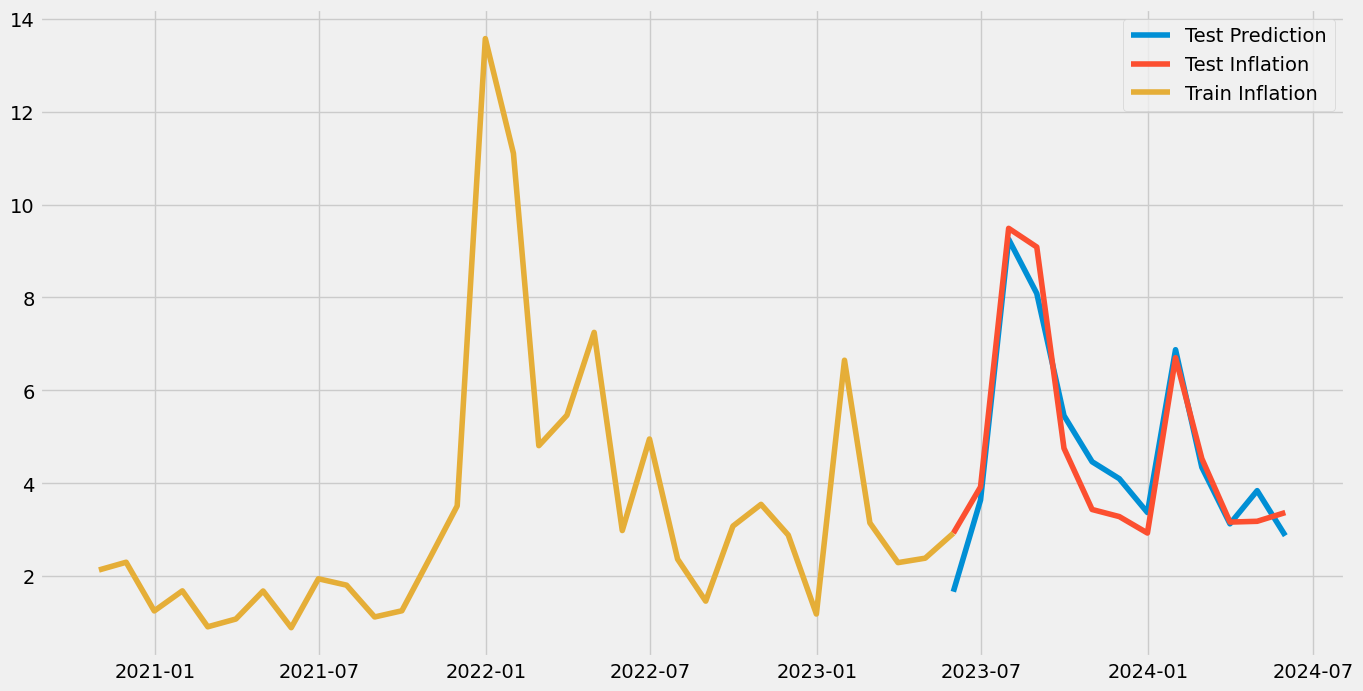

In [145]:
plt.figure(figsize=(15,8))
plt.plot(pd.DataFrame(scaler2.inverse_transform(np.array(model.predict(scaled_data.iloc[-14:-1,:-1])).reshape(-1,1))).set_index(data1.index[-14:-1]),label="Test Prediction")
plt.plot(data["TÜFE"].iloc[-14:-1],label="Test Inflation")
plt.plot(data["TÜFE"].iloc[-45:-13],label="Train Inflation")

plt.legend()

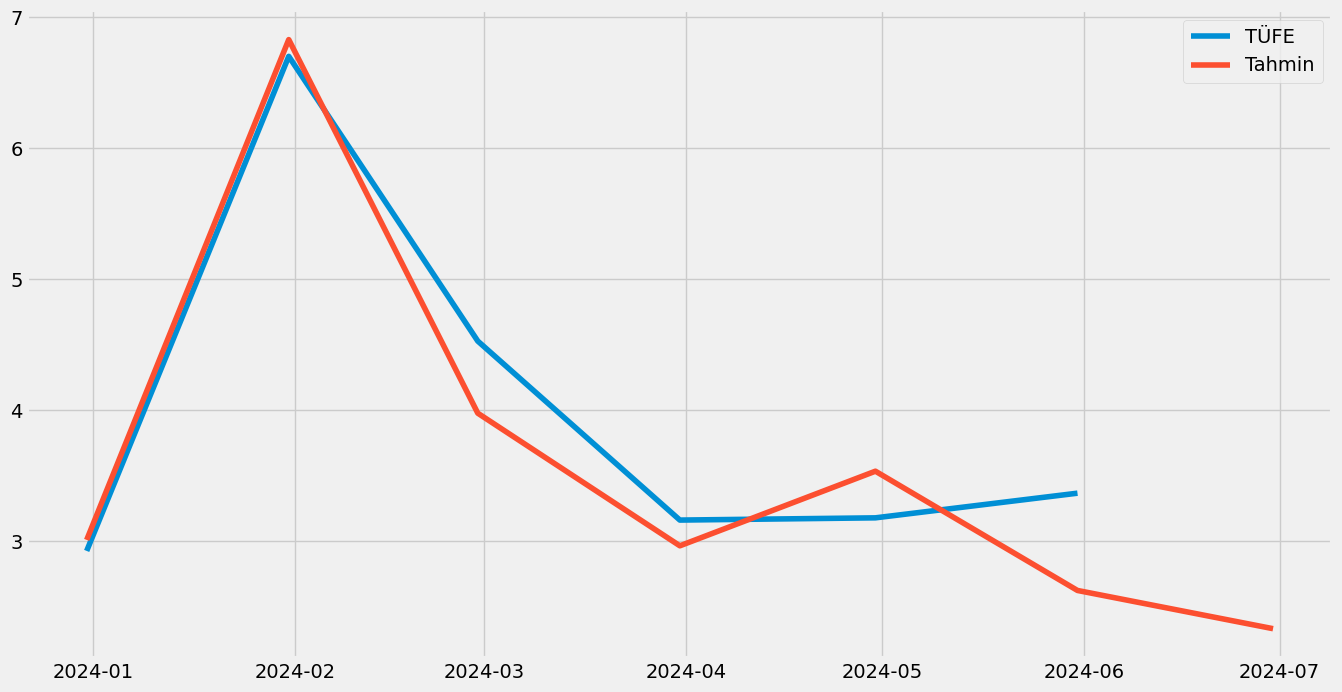

In [146]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"].iloc[:-1],label="TÜFE")
plt.plot(tahminler["NN1"],label="Tahmin")
plt.legend()

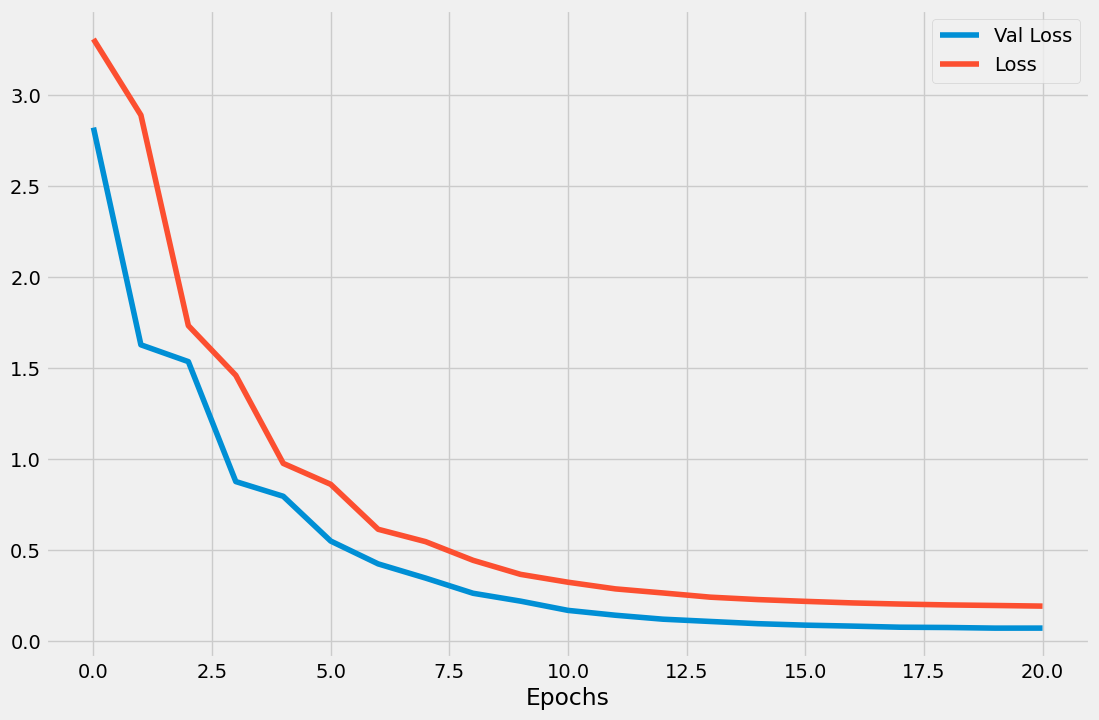

In [147]:
plt.figure(figsize=(12,8))
plt.plot(history.history["val_loss"],label="Val Loss")
plt.plot(history.history["loss"],label="Loss")
plt.xlabel("Epochs")
plt.legend()

In [148]:
kısatahminler=pd.concat([tahminler.iloc[-7:],tahminler2.iloc[-7:,1],tahminler3.iloc[-7:,1],tahminler4.iloc[-7:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,Ortalama
2023-12-31,2.927207,3.011147,3.338740,3.141940,3.368325,3.215038
2024-01-31,6.703310,6.831173,6.835962,4.898625,6.875293,6.360264
2024-02-29,4.529188,3.978722,4.258926,3.815700,4.342071,4.098855
2024-03-31,3.162671,2.966242,2.841101,2.839566,3.125211,2.943030
2024-04-30,3.179759,3.535907,3.996454,3.685323,3.839719,3.764351
2024-05-31,3.368063,2.625299,2.924061,2.778171,2.869797,2.799332
2024-06-30,1.640774,2.333482,2.210308,2.211577,2.236421,2.247947


## Orta Vadeli Tahminler

In [24]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-04-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[4:,0]=[50,50,50,50,50,50,50,50,50,50,50,45,40,35,35,35,35,30,30,30,30,30,25,25,25]
faiztahmin

,Faiz
2024-04-30,51.357222
2024-05-31,50.544545
2024-06-30,50.106471
2024-07-31,50.000000
2024-08-31,50.000000
2024-09-30,50.000000
2024-10-31,50.000000
2024-11-30,50.000000
2024-12-31,50.000000
2025-01-31,50.000000


In [25]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [26]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.897922
2007-08-31,94.606608
2007-10-31,98.111410
2007-11-30,110.422510
2007-12-31,107.237150
...,...
2023-11-30,2372.262380
2024-01-31,2403.605577
2024-02-29,2542.824291
2024-04-30,2888.414877


In [27]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [28]:
faiztahmin.columns=["Faiz"]


In [29]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [30]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [31]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [32]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-06-30,8.390175
2024-07-31,8.382133
2024-08-31,8.356908
2024-09-30,8.353280
2024-10-31,8.351119
2024-11-30,8.345414
2024-12-31,8.344594
2025-01-31,8.344105
2025-02-28,8.342815
2025-03-31,8.342629


In [33]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [34]:
import optuna


In [35]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.50,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=usd.index
    sn["y"]=usd.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=500,freq="D")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(usd.values,predictions["yhat"][:-500])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.01, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.50,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=usd.index\n    sn["y"]=usd.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],sea

In [36]:
"""study.best_params"""

'study.best_params'

In [35]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.828175414699565,changepoint_range=0.950080828826867,seasonality_prior_scale=7.816953755754968,n_changepoints=100,interval_width=0.70,yearly_seasonality=False,weekly_seasonality="auto")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=500,freq="D")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

15:56:19 - cmdstanpy - INFO - Chain [1] start processing
15:56:32 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
(predictions["yhat"].resample('M').mean().tail(18).pct_change()*100).dropna()

ds
2024-07-31    1.805803
2024-08-31    1.697911
2024-09-30    1.674164
2024-10-31    1.644795
2024-11-30    1.621680
2024-12-31    1.593375
2025-01-31    1.593167
2025-02-28    1.494920
2025-03-31    1.473089
2025-04-30    1.497462
2025-05-31    1.478189
2025-06-30    1.456005
2025-07-31    1.433539
2025-08-31    1.440455
2025-09-30    1.392227
2025-10-31    1.375084
2025-11-30    1.226030
Freq: ME, Name: yhat, dtype: float64

In [36]:
usdtahmin=(predictions["yhat"].resample('M').mean().tail(18).pct_change()*100).dropna()
usdtahmin

ds
2024-07-31    1.805803
2024-08-31    1.697911
2024-09-30    1.674164
2024-10-31    1.644795
2024-11-30    1.621680
2024-12-31    1.593375
2025-01-31    1.593167
2025-02-28    1.494920
2025-03-31    1.473089
2025-04-30    1.497462
2025-05-31    1.478189
2025-06-30    1.456005
2025-07-31    1.433539
2025-08-31    1.440455
2025-09-30    1.392227
2025-10-31    1.375084
2025-11-30    1.226030
Freq: ME, Name: yhat, dtype: float64

In [37]:
usd_aylık=usd.resample('M').mean().dropna()

In [38]:
usdtahmin1 = []
result = usd_aylık.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd_aylık["USD/TL"].loc["2024-03-31":],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882
2024-06-30,32.521235
2024-07-31,32.739730
2024-08-31,33.330945
2024-09-30,33.896875
2024-10-31,34.464364
2024-11-30,35.031232
2024-12-31,35.599327


In [42]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [43]:
"""study.best_params"""

'study.best_params'

In [39]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

15:56:41 - cmdstanpy - INFO - Chain [1] start processing
15:56:42 - cmdstanpy - INFO - Chain [1] done processing


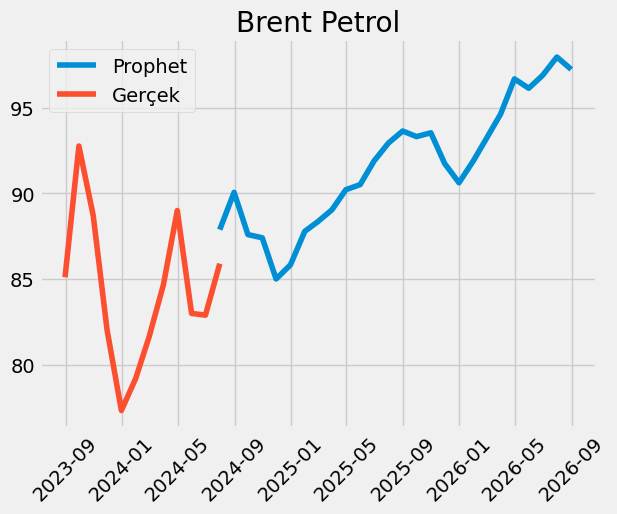

In [45]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [40]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-04-30    83.525077
2024-05-31    84.648887
2024-06-30    86.640455
2024-07-31    87.618002
2024-08-31    89.661470
2024-09-30    87.171284
2024-10-31    86.967871
2024-11-30    84.546632
2024-12-31    85.336152
2025-01-31    87.208856
2025-02-28    87.738273
2025-03-31    88.399796
2025-04-30    89.544336
2025-05-31    89.833507
2025-06-30    91.200575
2025-07-31    92.188506
2025-08-31    92.805796
2025-09-30    92.450119
2025-10-31    92.653609
2025-11-30    90.817729
2025-12-31    89.652255
2026-01-31    90.866758
2026-02-28    92.134837
2026-03-31    93.535992
2026-04-30    95.564670
2026-05-31    94.992312
2026-06-30    95.737292
2026-07-31    96.738101
2026-08-31    95.965776
Name: yhat, dtype: float64

In [47]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = o

15:56:45 - cmdstanpy - INFO - Chain [1] start processing
15:56:45 - cmdstanpy - INFO - Chain [1] done processing


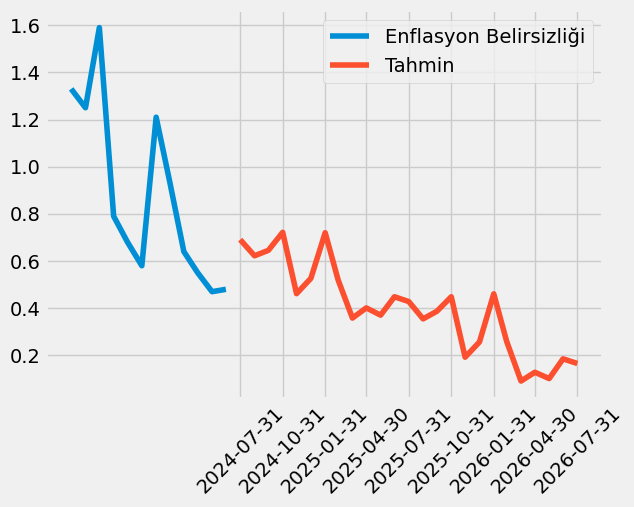

In [41]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=1.7,changepoint_range=0.91,seasonality_prior_scale=0.1053403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [42]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-06-30,0.480000
2024-07-31,0.690676
2024-08-31,0.622271
2024-09-30,0.645261
2024-10-31,0.721728
2024-11-30,0.461565
2024-12-31,0.526547
2025-01-31,0.719879
2025-02-28,0.519855


In [50]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [51]:
#study.best_params

In [43]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-05-31    1.345476
2024-06-30    2.352740
2024-07-31    1.128281
2024-08-31    2.332246
2024-09-30   -2.777320
2024-10-31   -0.233348
2024-11-30   -2.784061
2024-12-31    0.933828
2025-01-31    2.194503
2025-02-28    0.607067
2025-03-31    0.753974
2025-04-30    1.294731
2025-05-31    0.322937
2025-06-30    1.521779
2025-07-31    1.083250
2025-08-31    0.669596
2025-09-30   -0.383249
2025-10-31    0.220108
2025-11-30   -1.981445
2025-12-31   -1.283311
2026-01-31    1.354683
2026-02-28    1.395536
2026-03-31    1.520766
2026-04-30    2.168874
2026-05-31   -0.598922
2026-06-30    0.784252
2026-07-31    1.045370
2026-08-31   -0.798367
Name: yhat, dtype: float64

In [44]:
(usdtahmin1[:-5].pct_change(periods=1)*100).dropna()

,USD/TL
2024-04-30,1.071456
2024-05-31,-0.252354
2024-06-30,0.847663
2024-07-31,0.671852
2024-08-31,1.805803
2024-09-30,1.697911
2024-10-31,1.674164
2024-11-30,1.644795
2024-12-31,1.621680
2025-01-31,1.593375


In [54]:
(brenttahmin1[:-7]).dropna()

ds
2024-05-31    1.332686
2024-06-30    2.358100
2024-07-31    1.176537
2024-08-31    2.476461
2024-09-30   -2.739978
2024-10-31   -0.213751
2024-11-30   -2.750181
2024-12-31    0.968534
2025-01-31    2.280823
2025-02-28    0.635971
2025-03-31    0.796214
2025-04-30    1.313120
2025-05-31    0.331325
2025-06-30    1.518885
2025-07-31    1.138089
2025-08-31    0.762620
2025-09-30   -0.348744
2025-10-31    0.237808
2025-11-30   -1.920736
2025-12-31   -1.221495
2026-01-31    1.409263
Name: yhat, dtype: float64

In [44]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[:].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-7]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-04-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-04-30,0.290660
2024-05-31,2.094448
2024-06-30,1.985508
2024-07-31,3.019768
2024-08-31,-1.021671
2024-09-30,1.460601
2024-10-31,-1.156507
2024-11-30,2.593983
2024-12-31,3.851771
2025-01-31,2.210115


In [56]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [45]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=0.904897796889,changepoint_range=0.9529543315216538,growth='linear',seasonality_prior_scale=3.03031163229546,n_changepoints=15)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

15:56:54 - cmdstanpy - INFO - Chain [1] start processing
15:56:55 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-08-31    1.368295
2024-09-30    2.722858
2024-10-31    2.515838
2024-11-30    2.103581
2024-12-31    2.069846
2025-01-31    0.534719
2025-02-28    0.901291
2025-03-31    2.549992
2025-04-30    2.044283
2025-05-31    1.594831
2025-06-30    1.957230
2025-07-31    0.766919
2025-08-31    1.060230
2025-09-30    1.169579
2025-10-31    0.837335
2025-11-30    0.742187
2025-12-31    1.375386
2026-01-31   -0.559107
2026-02-28    0.012594
2026-03-31    1.363043
2026-04-30    0.271521
2026-05-31    0.442302
2026-06-30    1.022156
2026-07-31   -0.410471
2026-08-31    0.743687
Name: yhat, dtype: float64

In [47]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-08-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-6:,0]},index=pd.date_range(start="2024-02-28",periods=6,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
np.cumprod(1+(paraarzitahmin1.loc["2024-01-31":"2024-12-31"])/100)

,Para Arzi
2024-02-29,1.014672
2024-03-31,1.038990
2024-04-30,1.059585
2024-05-31,1.079288
2024-06-30,1.112820
2024-07-31,1.097879
2024-08-31,1.112901
2024-09-30,1.143204
2024-10-31,1.171965
2024-11-30,1.196618


In [60]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [61]:
#study.best_params

In [62]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [63]:
"""study.best_params"""

'study.best_params'

In [48]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=0.01099759561372614,changepoint_range=0.0589785485153,growth="linear",seasonality_prior_scale=0.04157847860739,n_changepoints=10,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

15:57:00 - cmdstanpy - INFO - Chain [1] start processing
15:57:00 - cmdstanpy - INFO - Chain [1] done processing


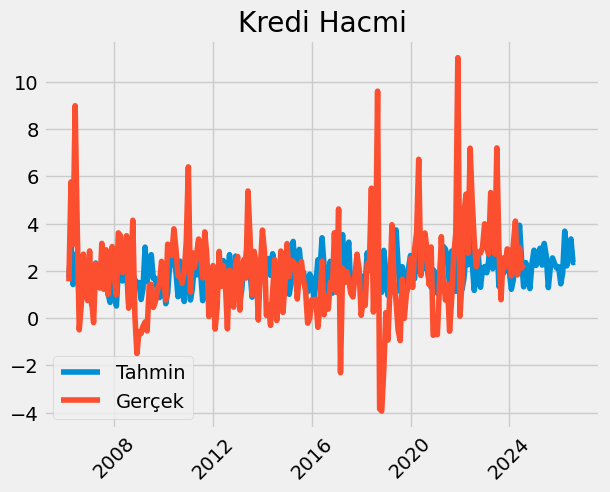

In [126]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [49]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-08-31    2.354026
2024-09-30    1.832739
2024-10-31    1.252202
2024-11-30    2.292968
2024-12-31    2.877728
2025-01-31    2.234268
2025-02-28    2.686440
2025-03-31    2.962300
2025-04-30    2.248274
2025-05-31    3.163278
2025-06-30    2.642724
2025-07-31    1.294567
2025-08-31    2.193707
2025-09-30    2.551362
2025-10-31    2.315106
2025-11-30    2.127025
2025-12-31    2.176223
2026-01-31    1.453898
2026-02-28    1.919571
2026-03-31    3.683149
2026-04-30    2.216278
2026-05-31    2.995417
2026-06-30    3.354656
2026-07-31    2.353587
2026-08-31    2.366915
Name: yhat, dtype: float64

In [50]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-08-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-04-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-04-30,1.832087
2024-05-31,2.996833
2024-06-30,2.125061
2024-07-31,2.283275
2024-08-31,2.354026
2024-09-30,1.832739
2024-10-31,1.252202
2024-11-30,2.292968
2024-12-31,2.877728
2025-01-31,2.234268


In [68]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [51]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=2.5,changepoint_range=0.9,growth='linear',seasonality_prior_scale=4.7636997959024185,n_changepoints=10)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=18,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

15:57:06 - cmdstanpy - INFO - Chain [1] start processing
15:57:06 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
m3tahmin=(predictions["yhat"].tail(18))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-08-30", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-04-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-04-30,2.405048
2024-05-31,3.570039
2024-06-30,2.937589
2024-07-31,2.390677
2024-08-31,1.856435
2024-09-30,3.048475
2024-10-31,3.226670
2024-11-30,2.805777
2024-12-31,2.032920
2025-01-31,1.022297


In [71]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [72]:
#study.best_params

In [73]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [74]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["Politika Faizi"]=faiztahmin["Faiz"]




tahmindf=tahmindf[['USD/TL', 'Motorin', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi','İşsizlik','Politika Faizi']]

tahmindf.columns=["USD/TL","Motorin","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi','İşsizlik','Politika Faizi']



tahmindf=tahmindf.loc["2024-07-30":]
tahmindf["Motorin"].iloc[0]=9.40
tahmindf["Kredi"].iloc[0]=1.7761
tahmindf["Enflasyon Belirsizliği"].iloc[0]=0.50
tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,İşsizlik,Politika Faizi
2024-07-31,0.422522,9.400000,0.0,0.500000,3.106854,2.937589,1.776100,8.382133,50.0
2024-08-31,1.110733,-1.021671,0.0,0.622271,-1.342612,2.390677,2.254121,8.356908,50.0
2024-09-30,1.395286,1.460601,0.0,0.645261,1.368295,1.856435,2.156680,8.353280,50.0
2024-10-31,1.725194,-1.156507,0.0,0.721728,2.722858,3.048475,1.812989,8.351119,50.0
2024-11-30,1.671994,2.593983,0.0,0.461565,2.515838,3.226670,1.792636,8.345414,50.0
2024-12-31,1.646592,3.851771,0.0,0.526547,2.103581,2.805777,2.140966,8.344594,50.0
2025-01-31,1.619672,2.210115,30.0,0.719879,2.069846,2.032920,2.468321,8.344105,50.0
2025-02-28,1.602589,2.359152,0.0,0.519855,0.534719,1.022297,2.599479,8.342815,50.0
2025-03-31,1.559967,2.809006,0.0,0.358107,0.901291,1.554802,2.627669,8.342629,50.0
2025-04-30,1.519776,1.800783,0.0,0.401186,2.549992,2.973797,2.632338,8.342519,50.0


In [54]:
data["TÜFE Lag"]=(enf.pct_change()*100).shift(1).dropna()["TÜFE"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-1]

In [55]:
data.loc["2023-06-30","TÜFE Lag"]=data.loc["2023-05-31","TÜFE"]

In [56]:
data=data.dropna()

In [57]:
data1=data[['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2',
       'ÜFEt1', 'TÜFECt1','Zam', 'TÜFE']]

In [330]:
import pandas as pd
from prophet import Prophet
import optuna
from sklearn.metrics import mean_squared_error
import cmdstanpy
import warnings
warnings.filterwarnings("ignore")


data1 = data.rename(columns={'TÜFE': 'y'})
data1["ds"]=pd.to_datetime(data.index)
data1=data1.reset_index().drop("index",axis=1)
data1["Motorin"].iloc[-1]=-1.61




regressors = ['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1']

# Prepare the data for Prophet
prophet_data = data1[['ds', 'y'] + regressors]

# Split the data into training and test sets
train_size = int(len(prophet_data) * 0.9)
train_data = prophet_data[:train_size]
test_data = prophet_data[train_size:]



def objective(trial):
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.001, 0.99)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.001, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.001, 10.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    n_changepoints = trial.suggest_int('n_changepoints', 1, 100)
    yearly_seasonality = trial.suggest_categorical('yearly_seasonality', [True, False, "auto"])
    weekly_seasonality = trial.suggest_categorical('weekly_seasonality', [True, False, "auto"])
    daily_seasonality = trial.suggest_categorical('daily_seasonality', [True, False, "auto"])

    # Initialize the Prophet model
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        seasonality_mode=seasonality_mode,
        n_changepoints=n_changepoints,
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        daily_seasonality=daily_seasonality
    )

    
    # Add selected regressors to the model
    for regressor in regressors:
        model.add_regressor(regressor)


    
    # Fit the model
    model.fit(train_data)
    
    # Make a DataFrame to hold future dates and include the regressors
    future = test_data[['ds'] + list(regressors)].copy()
    
    # Make predictions
    forecast = model.predict(future)
    
    # Merge actual and predicted values
    results = test_data[['ds', 'y']].copy()
    results = results.merge(forecast[['ds', 'yhat']], on='ds')
    
    # Calculate MSE
    mse = mean_squared_error(results['y'], results['yhat'])
    
    return mse

# Create a study object and optimize the objective function
warnings.filterwarnings("ignore")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)  # Adjust n_trials as needed

# Print the best hyperparameters
print('Best hyperparameters: ', study.best_params)

# Train the final model with the best hyperparameters
best_params = study.best_params


model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    n_changepoints=best_params['n_changepoints'],
    yearly_seasonality=best_params['yearly_seasonality'],
    weekly_seasonality=best_params['weekly_seasonality'],
    daily_seasonality=best_params['daily_seasonality'],
    interval_width=0.7
)

for regressor in regressors:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(regressors)].copy()
forecast = model.predict(future)

# Merge actual and predicted values
results = test_data[['ds', 'y']].copy()
results = results.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# Calculate and print performance metrics
mse = mean_squared_error(results['y'], results['yhat'])
print(f'Mean Squared Error: {mse:.4f}')



[I 2024-07-14 18:29:50,272] A new study created in memory with name: no-name-47bf6279-4052-4b62-b524-afaf01580590
18:29:50 - cmdstanpy - INFO - Chain [1] start processing
18:29:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-14 18:29:50,605] Trial 0 finished with value: 0.7933443081849619 and parameters: {'changepoint_prior_scale': 0.01987130857067565, 'seasonality_prior_scale': 0.0020486376750919956, 'holidays_prior_scale': 2.5979554889239234, 'seasonality_mode': 'additive', 'n_changepoints': 92, 'yearly_seasonality': 'auto', 'weekly_seasonality': True, 'daily_seasonality': 'auto'}. Best is trial 0 with value: 0.7933443081849619.
18:29:50 - cmdstanpy - INFO - Chain [1] start processing
18:29:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-14 18:29:50,893] Trial 1 finished with value: 0.7642583804207967 and parameters: {'changepoint_prior_scale': 0.03550741678254664, 'seasonality_prior_scale': 6.873675765370961, 'holidays_prior_scale': 0.023057669168905965, 's

Best hyperparameters:  {'changepoint_prior_scale': 0.012675729015880828, 'seasonality_prior_scale': 0.001957732700205718, 'holidays_prior_scale': 0.09374009299752417, 'seasonality_mode': 'multiplicative', 'n_changepoints': 77, 'yearly_seasonality': 'auto', 'weekly_seasonality': True, 'daily_seasonality': True}


18:36:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 0.3880


In [202]:
üfe=pd.DataFrame()
üfe["ds"]=pd.to_datetime(data1["ds"])
üfe["y"]=data1["ÜFEt1"].values
üfe["USD/TL"]=data1["USD/TL"].values
train_size = int(len(üfe) * 0.9)
train_data = üfe[:train_size]
test_data = üfe[train_size:]

In [211]:
üfe=pd.DataFrame()
üfe["ds"]=pd.to_datetime(data1["ds"])
üfe["y"]=data1["ÜFEt1"].values
üfe["USD/TL"]=data1["USD/TL"].values
train_size = int(len(üfe) * 0.9)
train_data = üfe[:train_size]
test_data = üfe[train_size:]



def objective(trial):
    changepoint_prior_scale = trial.suggest_loguniform('changepoint_prior_scale', 0.01, 0.99)
    seasonality_prior_scale = trial.suggest_loguniform('seasonality_prior_scale', 0.01, 10.0)
    holidays_prior_scale = trial.suggest_loguniform('holidays_prior_scale', 0.01, 10.0)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])
    n_changepoints = trial.suggest_int('n_changepoints', 1, 50)
    yearly_seasonality = trial.suggest_categorical('yearly_seasonality', [True, False, "auto"])
    weekly_seasonality = trial.suggest_categorical('weekly_seasonality', [True, False, "auto"])
    daily_seasonality = trial.suggest_categorical('daily_seasonality', [True, False, "auto"])

    # Initialize the Prophet model
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        seasonality_mode=seasonality_mode,
        n_changepoints=n_changepoints,
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        daily_seasonality=daily_seasonality
    )

    

    model.add_regressor("USD/TL")
    model.fit(train_data)
    

    future = test_data[['ds' , 'USD/TL']].copy()
    
    # Make predictions
    forecast = model.predict(future)
    
    # Merge actual and predicted values
    results = test_data[['ds', 'y']].copy()
    results = results.merge(forecast[['ds', 'yhat']], on='ds')
    
    # Calculate MSE
    mse = mean_squared_error(results['y'], results['yhat'])
    
    return mse

# Create a study object and optimize the objective function
warnings.filterwarnings("ignore")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)  # Adjust n_trials as needed

[I 2024-07-14 16:38:21,260] A new study created in memory with name: no-name-b70ca07d-e082-41da-bbf3-2801e33543ac
16:38:21 - cmdstanpy - INFO - Chain [1] start processing
16:38:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-14 16:38:21,525] Trial 0 finished with value: 10.904130340079488 and parameters: {'changepoint_prior_scale': 0.021780330890694307, 'seasonality_prior_scale': 0.7873088879348036, 'holidays_prior_scale': 6.121714874577102, 'seasonality_mode': 'multiplicative', 'n_changepoints': 43, 'yearly_seasonality': False, 'weekly_seasonality': True, 'daily_seasonality': False}. Best is trial 0 with value: 10.904130340079488.
16:38:21 - cmdstanpy - INFO - Chain [1] start processing
16:38:21 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-14 16:38:21,805] Trial 1 finished with value: 4.505498263954272 and parameters: {'changepoint_prior_scale': 0.9725505312214788, 'seasonality_prior_scale': 7.911970759901998, 'holidays_prior_scale': 7.368931846698078, 'seaso

In [218]:
best_params = study.best_params


model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    n_changepoints=best_params['n_changepoints'],
    yearly_seasonality=best_params['yearly_seasonality'],
    weekly_seasonality=best_params['weekly_seasonality'],
    daily_seasonality=best_params['daily_seasonality'],
    interval_width=0.5
)

model.add_regressor("USD/TL")

model.fit(train_data)

future = test_data[['ds' , 'USD/TL']].copy()
forecast = model.predict(future)

16:51:39 - cmdstanpy - INFO - Chain [1] start processing
16:51:39 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
tahmindf["ds"]=pd.to_datetime(tahmindf.index)
tahmindf=tahmindf.reset_index().drop("index",axis=1)


In [219]:
future=tahmindf[["ds","USD/TL"]]
forecast = model.predict(future)

In [220]:
üfetahmin=forecast[["ds","yhat_lower"]]
üfetahmin

,ds,yhat_lower
0,2024-07-31,1.406257
1,2024-08-31,1.585320
2,2024-09-30,1.716878
3,2024-10-31,1.701897
4,2024-11-30,1.790501
5,2024-12-31,1.746273
6,2025-01-31,1.641514
7,2025-02-28,1.604859
8,2025-03-31,1.577120
9,2025-04-30,1.508288


In [222]:
tahmindf["ÜFEt1"]=üfetahmin["yhat_lower"].values
tahmindf["TÜFEt-1"]=0
tahmindf["TÜFEt-1"].iloc[0]=data["TÜFE"].iloc[-1]

In [344]:
data2 = data.rename(columns={'TÜFE': 'y'})
data2["ds"]=data.index
data2=data2.reset_index().drop("index",axis=1)
data2["Motorin"].iloc[-1]=-1.61
# Define the list of additional regressors
regressors = ['USD/TL', 'Motorin', 'M3', 'Enflasyon Belirsizliği', 'TÜFEt-1',
       'ParaArzi', 'Kredi', 'İşsizlik', 'Politika Faizi', 'ÜFEt2', 'TÜFECt2',
       'ÜFEt1', 'TÜFECt1','Zam']

# Prepare the data for Prophet
prophet_data = data2[['ds', 'y'] + regressors]

# Split the data into training and test sets
train_size = int(len(prophet_data) * 0.9)
train_data = prophet_data[:train_size]
test_data = prophet_data[train_size:]


In [345]:
params=  {'changepoint_prior_scale': 0.015216161126164657, 'seasonality_prior_scale': 0.0029079778527052727, 'holidays_prior_scale': 2.111013606893588, 'seasonality_mode': 'multiplicative', 'n_changepoints': 92, 'yearly_seasonality': True, 'weekly_seasonality': True, 'daily_seasonality': False}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1')

model = Prophet(**params,interval_width=0.5)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast1 = model.predict(future)

results1 = data2[['ds', 'y']].iloc[-13:].copy()
results1 = results1.merge(forecast1[['ds', 'yhat']], on='ds')
results1.iloc[-2,-1]+=0.66
results1=results1.set_index(pd.to_datetime(results1["ds"]))
del results1["ds"]
forecast1=forecast1.set_index(pd.to_datetime(forecast1["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast1= model.predict(future)


18:38:59 - cmdstanpy - INFO - Chain [1] start processing
18:38:59 - cmdstanpy - INFO - Chain [1] done processing


In [346]:
params=  {'changepoint_prior_scale': 0.009773311452850347, 'seasonality_prior_scale': 0.009822947368276132, 'holidays_prior_scale': 2.734013344954643, 'seasonality_mode': 'multiplicative', 'n_changepoints': 63, 'yearly_seasonality': False, 'weekly_seasonality': 'auto', 'daily_seasonality': True}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1','ParaArzi')

model = Prophet(**params,interval_width=0.5)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast2 = model.predict(future)

results2 = data2[['ds', 'y']].iloc[-13:].copy()
results2 = results2.merge(forecast2[['ds', 'yhat']], on='ds')
results2.iloc[-2,-1]+=0.66
results2=results2.set_index(pd.to_datetime(results2["ds"]))
del results2["ds"]
forecast2=forecast2.set_index(pd.to_datetime(forecast2["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast2= model.predict(future)

18:39:01 - cmdstanpy - INFO - Chain [1] start processing
18:39:01 - cmdstanpy - INFO - Chain [1] done processing


In [347]:
params= {'changepoint_prior_scale': 0.017308864356226254, 'seasonality_prior_scale': 0.03523965598481892, 'holidays_prior_scale': 0.141087251967483, 'seasonality_mode': 'multiplicative', 'n_changepoints': 46, 'yearly_seasonality': 'auto', 'weekly_seasonality': False, 'daily_seasonality': 'auto'}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1')

model = Prophet(**params,interval_width=0.5)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast3 = model.predict(future)

results3 = data2[['ds', 'y']].iloc[-13:].copy()
results3 = results3.merge(forecast3[['ds', 'yhat']], on='ds')
results3.iloc[-2,-1]+=0.66
results3=results3.set_index(pd.to_datetime(results3["ds"]))
del results3["ds"]
forecast3=forecast3.set_index(pd.to_datetime(forecast3["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast3= model.predict(future)

18:39:02 - cmdstanpy - INFO - Chain [1] start processing
18:39:02 - cmdstanpy - INFO - Chain [1] done processing


In [348]:
params= {'changepoint_prior_scale': 0.022684389480075222, 'seasonality_prior_scale': 0.004633178781555632, 'holidays_prior_scale': 0.09701041865099715, 'seasonality_mode': 'multiplicative', 'n_changepoints': 56, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': True}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam')

model = Prophet(**params,interval_width=0.5)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast4 = model.predict(future)

results4 = data2[['ds', 'y']].iloc[-13:].copy()
results4 = results4.merge(forecast4[['ds', 'yhat']], on='ds')
results4.iloc[-2,-1]+=0.66
results4=results4.set_index(pd.to_datetime(results4["ds"]))
del results4["ds"]
forecast4=forecast4.set_index(pd.to_datetime(forecast4["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast4= model.predict(future)

18:39:04 - cmdstanpy - INFO - Chain [1] start processing
18:39:04 - cmdstanpy - INFO - Chain [1] done processing


In [349]:
params={'changepoint_prior_scale': 0.01806485402864186, 'seasonality_prior_scale': 0.0014006120341357132, 'holidays_prior_scale': 0.3157449729829788, 'seasonality_mode': 'multiplicative', 'n_changepoints': 19, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': True}
best_regressor_combination = ('USD/TL', 'Motorin', 'Enflasyon Belirsizliği', 'TÜFEt-1', 'Kredi', 'İşsizlik', 'Zam','ÜFEt1')

model = Prophet(**params,interval_width=0.5)

for regressor in best_regressor_combination:
    model.add_regressor(regressor)

model.fit(train_data)

# Make predictions on the test data
future = test_data[['ds'] + list(best_regressor_combination)].copy()
future = test_data[['ds'] + list(best_regressor_combination)].copy()
forecast5 = model.predict(future)

results5 = data2[['ds', 'y']].iloc[-13:].copy()
results5 = results5.merge(forecast5[['ds', 'yhat']], on='ds')
results5.iloc[-2,-1]+=0.66
results5=results5.set_index(pd.to_datetime(results5["ds"]))
del results5["ds"]
forecast5=forecast5.set_index(pd.to_datetime(forecast5["ds"]))

future=tahmindf[['ds'] + list(best_regressor_combination)]
forecast5= model.predict(future)


18:39:05 - cmdstanpy - INFO - Chain [1] start processing
18:39:05 - cmdstanpy - INFO - Chain [1] done processing


In [350]:
futures=pd.concat([forecast1[["yhat","yhat_lower"]],forecast2[["yhat","yhat_lower"]],forecast3[["yhat","yhat_lower"]],forecast4[["yhat","yhat_lower"]],forecast5[["yhat","yhat_lower"]]],axis=1)
futures=futures.set_index(pd.to_datetime(tahmindf["ds"]))
futures.columns=["p1","p1min","p2","p2min","p3","p3min","p4","p4min","p5","p5min"]
temmuz=futures[["p1","p2","p3","p4","p5"]].mean(axis=1).iloc[0]
futures["ortalama"]=futures[["p1min","p2min","p3min","p4min","p5min"]].mean(axis=1)
futures["ortalama"].iloc[0]=temmuz
futures["max"]=futures[["p1","p2","p3","p4","p5"]].min(axis=1)
futures["min"]=futures[["p1min","p2min","p3min","p4min","p5min"]].min(axis=1)
futures["min"].iloc[0]=futures[["p1","p2","p3","p4","p5"]].min(axis=1).iloc[0]
futures

,p1,p1min,p2,p2min,p3,p3min,p4,p4min,p5,p5min,ortalama,max,min
ds,,,,,,,,,,,,,
2024-07-31,2.987013,2.349543,3.083972,2.435638,3.069699,2.421234,3.325790,2.514188,2.982244,2.306829,3.089744,2.982244,2.982244
2024-08-31,2.376072,1.672650,1.814333,1.275275,2.618005,1.988933,2.528755,1.782791,2.327118,1.577390,1.659408,1.814333,1.275275
2024-09-30,2.636890,2.046633,2.478730,1.837598,3.218987,2.593143,2.838253,2.208714,2.619482,1.957421,2.128702,2.478730,1.837598
2024-10-31,2.530154,1.901517,2.592713,1.942421,3.178719,2.505580,2.708460,2.004087,2.493231,1.853110,2.041343,2.493231,1.853110
2024-11-30,2.543837,1.935183,2.577586,1.992915,2.819770,2.142405,2.726151,1.976038,2.528501,1.881166,1.985541,2.528501,1.881166
2024-12-31,2.770136,2.080943,2.719120,2.085469,3.557874,2.934281,3.006548,2.255794,2.775819,2.007622,2.272822,2.719120,2.007622
2025-01-31,3.865355,3.231292,3.799070,3.089013,4.659459,4.047793,4.295075,3.547138,4.027691,3.339872,3.451022,3.799070,3.089013
2025-02-28,2.726609,2.112145,2.424969,1.790119,3.021247,2.295789,2.957379,2.215285,2.727593,2.072553,2.097178,2.424969,1.790119
2025-03-31,2.596274,1.919100,2.358441,1.740193,3.071740,2.478216,2.809949,2.142262,2.590159,1.936942,2.043343,2.358441,1.740193


In [353]:
def create_tüfe(data):
    tüfetahmin = []
    result = enf["TÜFE"].iloc[-1]
    pred=np.array(data.values).reshape(1,-1).ravel()
    for i in range(len(pred)):
        result *= (1 + (pred[i] / 100))
        tüfetahmin.append(result)
    tüfetahmin[0]=enf["TÜFE"].iloc[-1]*(1+(data[0]/100))

    tüfetahmin = np.array(tüfetahmin).reshape(-1, 1)
    tüfetahmin = pd.DataFrame(tüfetahmin)
    tüfetahmin = tüfetahmin.set_index(pd.date_range(start="2024-07-30", periods=len(tüfetahmin), freq="1M"))
    return tüfetahmin


In [354]:
tüfetahmin1=create_tüfe(futures["ortalama"])
tüfetahmin1.columns=["Ortalama"]
tüfetahmin2=create_tüfe(futures["max"])
tüfetahmin2.columns=["Max"]
tüfetahmin3=create_tüfe(futures["min"])
tüfetahmin3.columns=["Min"]
tüfetahmin4=create_tüfe(futures["p1min"])
tüfetahmin4.columns=["p1"]
tüfetahmin5=create_tüfe(futures["p2min"])
tüfetahmin5.columns=["p2"]
tüfetahmin6=create_tüfe(futures["p3min"])
tüfetahmin6.columns=["p3"]
tüfetahmin7=create_tüfe(futures["p4min"])
tüfetahmin7.columns=["p4"]
tüfetahmin8=create_tüfe(futures["p5min"])
tüfetahmin8.columns=["p5"]


In [355]:
tüfetahmin=pd.concat([tüfetahmin1,tüfetahmin2,tüfetahmin3,tüfetahmin4,tüfetahmin5,tüfetahmin6,tüfetahmin7,tüfetahmin8],axis=1)

In [356]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

dfas9=pd.DataFrame()
dfas9=pd.concat([df["CPI"],tüfetahmin.iloc[:,7]],axis=0)
dfas9=pd.DataFrame(dfas9)
dfas9.columns=[tüfetahmin.columns[7]]



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas9],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








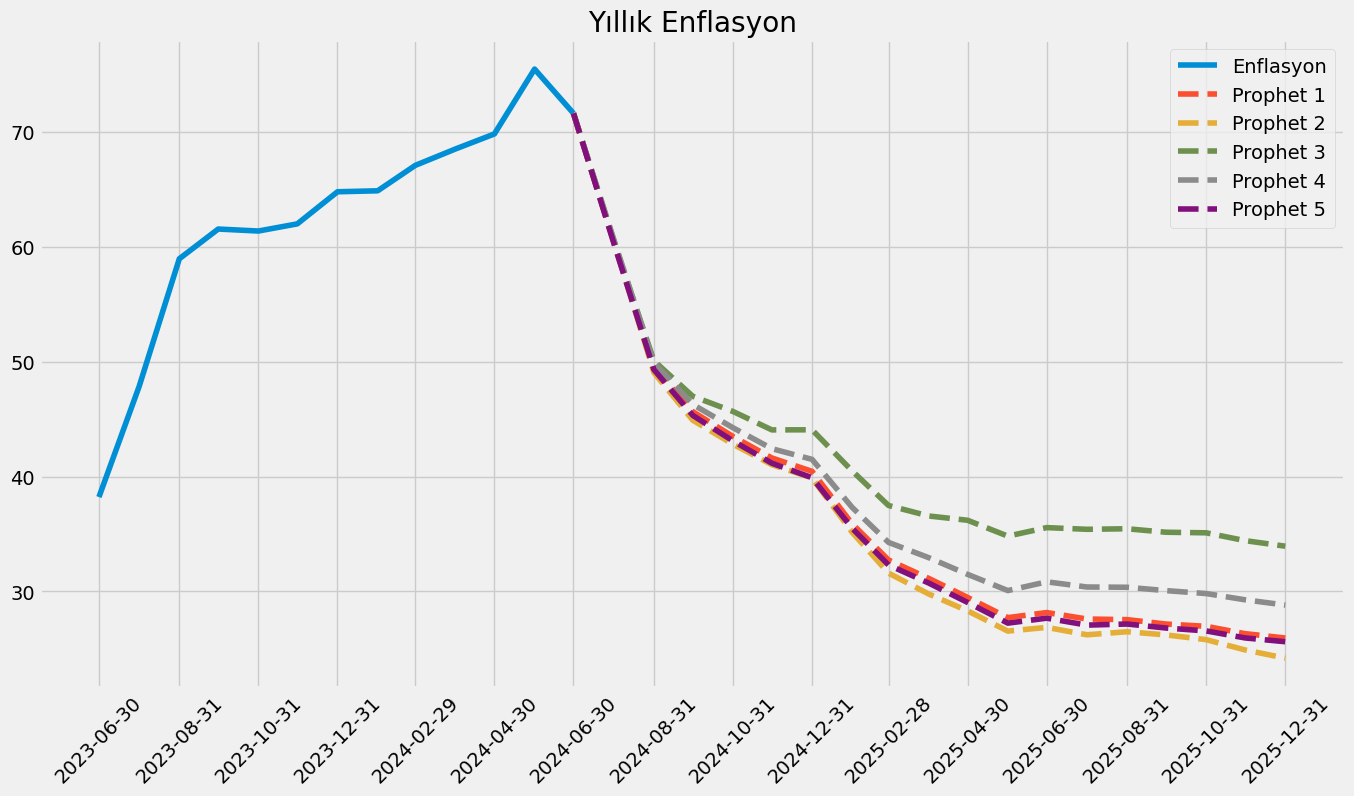

In [357]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.plot(dfas["Ortalama"].loc["2023-06-30":"2024-07-30"],label="Enflasyon")
plt.plot(dfas["p1"].loc["2024-06-30":],'--',label="Prophet 1")
plt.plot(dfas["p2"].loc["2024-06-30":],'--',label="Prophet 2")
plt.plot(dfas["p3"].loc["2024-06-30":],'--',label="Prophet 3")
plt.plot(dfas["p4"].loc["2024-06-30":],'--',label="Prophet 4")
plt.plot(dfas["p5"].loc["2024-06-30":],'--',label="Prophet 5")
plt.legend(loc=0)
plt.xticks(dfas.loc["2023-06-30":].index[::2],rotation=45)
plt.title("Yıllık Enflasyon")
plt.show()

In [358]:
dfas["Min"]=dfas.min(axis=1)

In [359]:
sonu12024=str(dfas["Ortalama"].loc["2024-12-31"])[:5]
min2024=str(dfas["Min"].loc["2024-12-31"])[:5]
max2024=str(dfas["Max"].loc["2024-12-31"])[:5]

In [315]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-06-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-04-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-04-30,43.52


In [360]:
dfas.tail(13)

,Ortalama,Max,Min,p1,p2,p3,p4,p5
2024-12-31,42.093025,44.671501,39.874462,40.451073,39.874462,44.066138,41.493598,39.896949
2025-01-31,37.762067,40.733848,35.136579,35.880938,35.136579,40.480776,37.308366,35.487201
2025-02-28,34.556850,37.900812,31.595478,32.738943,31.595478,37.479225,34.268849,32.302993
2025-03-31,33.096891,36.825773,29.780949,31.138846,29.780949,36.567090,32.940760,30.731032
2025-04-30,31.752878,35.992682,28.313006,29.481322,28.313006,36.194564,31.489789,29.044939
2025-05-31,30.116919,34.978312,26.552885,27.724705,26.552885,34.815912,30.078483,27.245465
2025-06-30,30.656823,36.208292,26.876398,28.167239,26.876398,35.555361,30.838820,27.677549
2025-07-31,29.303703,35.597174,25.540962,27.604291,26.232708,35.409106,30.389336,27.072371
2025-08-31,29.370572,35.996030,25.803034,27.551303,26.496223,35.455707,30.366468,27.167973
2025-09-30,29.049793,35.634837,25.529062,27.166991,26.220742,35.153165,30.074329,26.820321


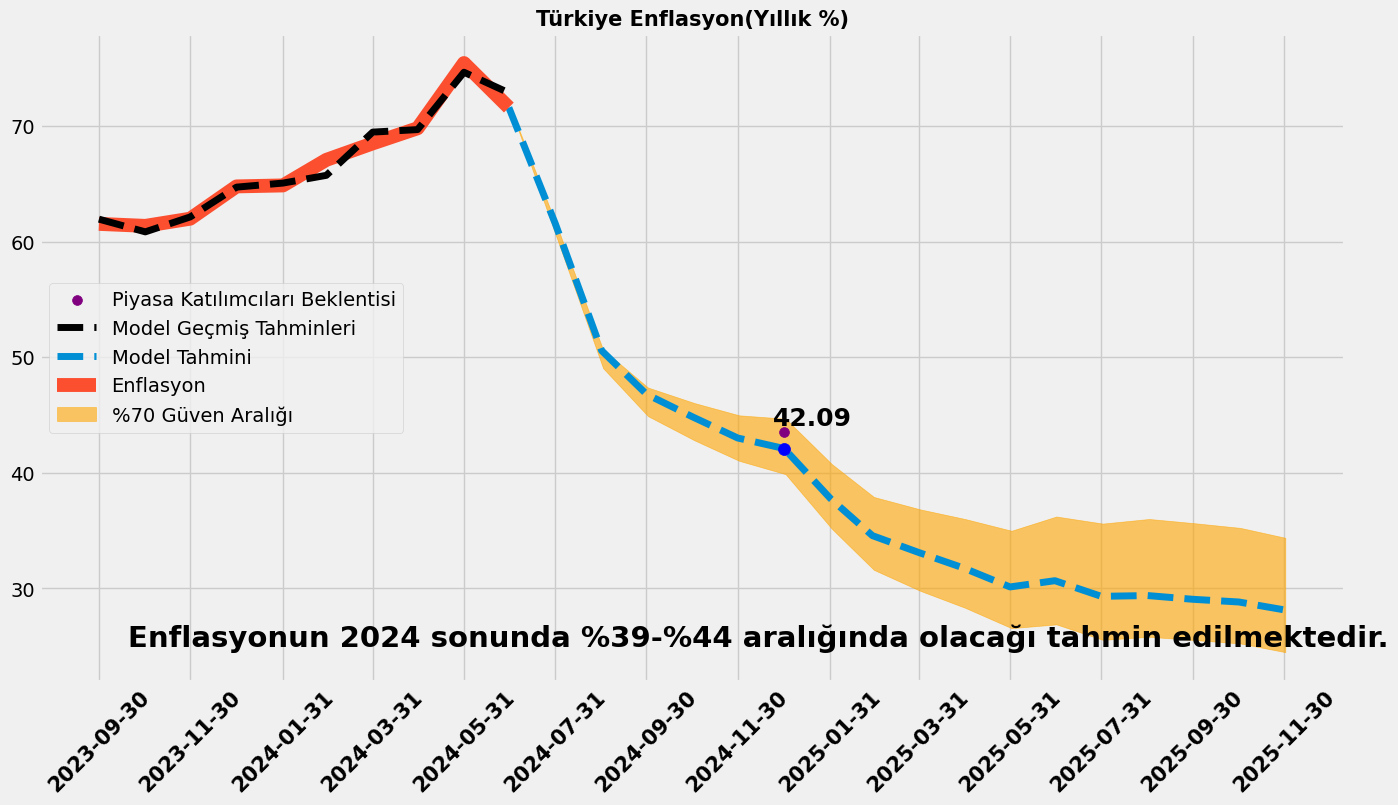

In [365]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["Beklenti"].values,color="purple",zorder=3,s=50,label="Piyasa Katılımcıları Beklentisi")
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65,72.87]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-06-30",freq="M"))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.scatter(x=dfas.loc["2024-12-31":].index[0],y=dfas["Ortalama"].loc["2024-12-31"],color='blue',zorder=4,s=75)
plt.plot(dfas["Ortalama"].loc["2024-06-30":"2025-11-30"],'--',label="Model Tahmini",linewidth=5)
plt.plot(dfas["Ortalama"].loc["2023-09-30":"2024-06-30"],label="Enflasyon",linewidth=10)
plt.fill_between(dfas.loc["2024-06-30":].index.strftime("%Y-%m"), dfas["Max"].loc["2024-06-30":].shift(1), dfas["Min"].loc["2024-06-30":].shift(1), alpha=0.6, color='orange',label="%70 Güven Aralığı")
annotation_date = mdates.datestr2num('2024-12')
plt.text(mdates.datestr2num('2025-02'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 25, f"Enflasyonun 2024 sonunda %{min2024[:2]}-%{max2024[:2]} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='center',fontweight='bold')
plt.xticks(dfas.loc["2023-09-30":"2025-11-30"].index[::2],rotation=45,fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=6)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()

In [466]:
futures

,p1,p1min,p2,p2min,p3,p3min,p4,p4min,p5,p5min,ortalama,max,min
ds,,,,,,,,,,,,,
2024-07-31,3.261788,2.516845,3.347490,2.420129,3.503364,2.461553,3.456129,2.432999,3.210743,2.212864,3.355903,3.210743,3.210743
2024-08-31,2.623959,1.934348,2.086886,1.245944,2.969673,1.987001,2.691320,1.728834,2.402072,1.414234,1.662072,2.086886,1.245944
2024-09-30,2.958658,2.224944,2.770954,1.849520,3.313546,2.237323,3.045038,2.053264,2.881010,1.912192,2.055449,2.770954,1.849520
2024-10-31,2.834829,2.147372,2.897397,2.023148,3.209934,2.146079,2.910853,1.829139,2.762860,1.813576,1.991863,2.762860,1.813576
2024-11-30,2.895899,2.218266,2.874929,1.983144,3.318799,2.297794,2.990909,1.947265,2.751350,1.742331,2.037760,2.751350,1.742331
2024-12-31,3.119393,2.333848,2.994318,2.030785,3.511117,2.505393,3.229442,2.151728,3.128377,2.116918,2.227734,2.994318,2.030785
2025-01-31,4.495698,3.725566,4.086920,3.229311,4.971915,3.986818,4.581701,3.551988,4.611362,3.612364,3.621209,4.086920,3.229311
2025-02-28,3.077002,2.310659,2.712807,1.824401,3.453891,2.475861,3.169831,2.148666,2.912003,1.877312,2.127380,2.712807,1.824401
2025-03-31,2.953051,2.287871,2.647691,1.688578,3.359346,2.408064,3.059427,2.096719,2.842813,1.832563,2.062759,2.647691,1.688578


In [123]:
aylıktahmin[[ 'NN1','NN2','NN3','NN4','NN5', 'Ortalama','Ensemble']].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [138]:
yıllıktahmin1=yıllıktahmin[['Ortalama','NN1','NN2','NN3','NN4','NN5','Ensemble', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama','NN1','NN2','NN3','NN4','NN5','Ensemble', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04'),
  Text(8, 0, '2024-05'),
  Text(9, 0, '2024-06')])

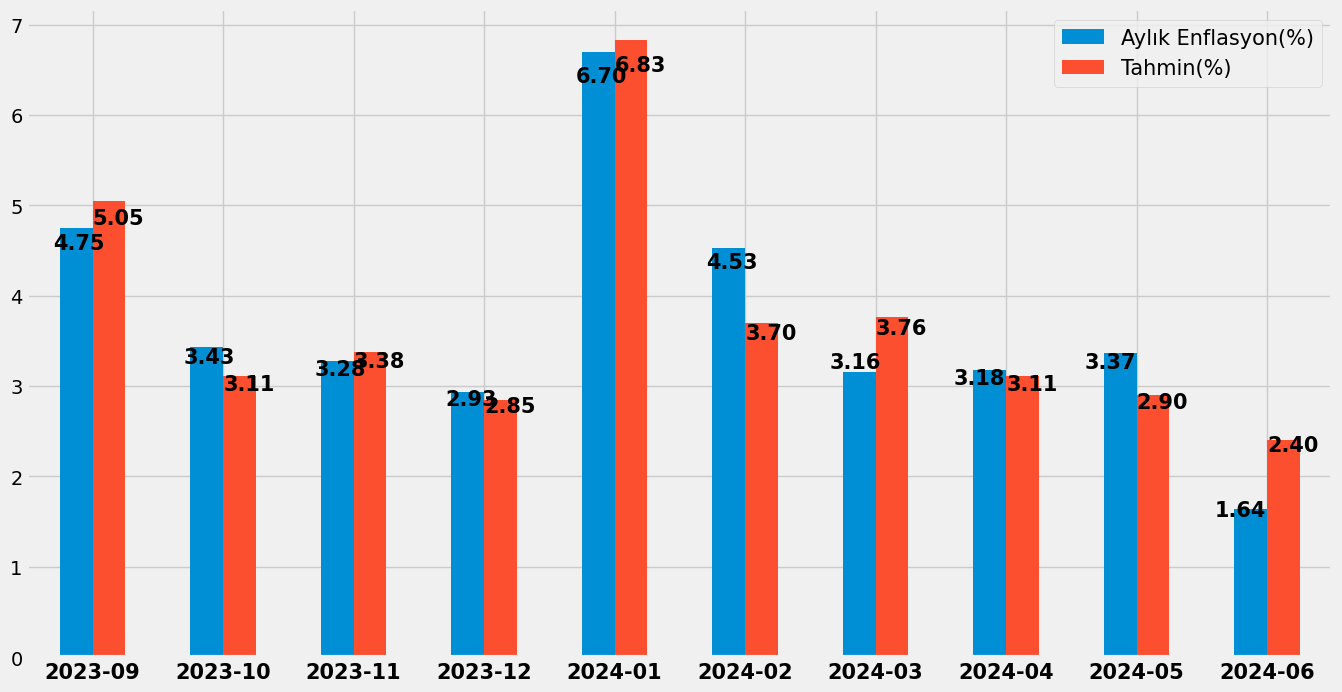

In [475]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18,3.37,1.64],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11,2.90,2.40]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=10,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(15,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.85),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.37",xy=(7.6,gecmis.iloc[8,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.90",xy=(8,gecmis.iloc[8,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("1.64",xy=(8.6,gecmis.iloc[9,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.40",xy=(9,gecmis.iloc[9,1]*0.95),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(x=["Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık","Ocak 25","Şubat 25","Mart 25","Nisan 25","Mayıs 25","Haziran 25","Temmuz 25"],height=aylıktahmin.iloc[:,-3])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-3])[:4],xy=(-0.25,aylıktahmin.iloc[0,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-3])[:4],xy=(0.75,aylıktahmin.iloc[1,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-3])[:4],xy=(1.75,aylıktahmin.iloc[2,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-3])[:4],xy=(2.75,aylıktahmin.iloc[3,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-3])[:4],xy=(3.75,aylıktahmin.iloc[4,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-3])[:4],xy=(4.75,aylıktahmin.iloc[5,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-3])[:4],xy=(5.75,aylıktahmin.iloc[6,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-3])[:4],xy=(6.75,aylıktahmin.iloc[7,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-3])[:4],xy=(7.75,aylıktahmin.iloc[8,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-3])[:4],xy=(8.75,aylıktahmin.iloc[9,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-3])[:4],xy=(9.75,aylıktahmin.iloc[10,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-3])[:4],xy=(10.75,aylıktahmin.iloc[11,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[12,-3])[:4],xy=(11.75,aylıktahmin.iloc[12,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[13,-3])[:4],xy=(12.75,aylıktahmin.iloc[13,-3]*0.95),fontweight="bold",fontsize=15)


